In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data.csv', header = 'infer')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,18,21,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
noise = df[df.complaint_type == 'Noise - Residential']
heatwater = df[df.complaint_type == 'HEAT/HOT WATER']
other = df[(df.complaint_type != 'HEAT/HOT WATER') & (df.complaint_type != 'Noise - Residential')]

In [4]:

count_noise = noise.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_noise))

count_heatwater = heatwater.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_heatwater))

count_other = other.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_other))

# note: we won't use count_all in the charts, but we can use it as a check that the subsets all add up to the correct total
count_all = df.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_all))

69
66
77
77


In [0]:

valid_borocds = ['101','102','103','104','105','106','107','108','109','110','111','112','201','202','203','204','205','206','207','208','209','210','211','212','301','302','303','304','305','306','307','308','309','310','311','312','313','314','315','316','317','318','401','402','403','404','405','406','407','408','409','410','411','412','413','414','501','502','503']

In [0]:
# this function will recode the community_board value into borocd in a new column

def recode_borocd_counts(row):
  if row.community_board[0] != 'U':
    if 'MANHATTAN' in row.community_board:
      return '1' + row.community_board[0:2]
    elif 'BRONX' in row.community_board:
      return '2' + row.community_board[0:2]
    elif 'BROOKLYN' in row.community_board:
      return '3' + row.community_board[0:2]
    elif 'QUEENS' in row.community_board:
      return '4' + row.community_board[0:2]
    elif 'STATEN ISLAND' in row.community_board:
      return '5' + row.community_board[0:2]
  else:
    return 'Invalid borocd'

# we can apply the function to each of our dataframes. this is the beauty of functions; you can reuse them on multiple objects!

count_noise['borocd'] = count_noise.apply(recode_borocd_counts, axis=1)

count_heatwater['borocd'] = count_heatwater.apply(recode_borocd_counts, axis=1)

count_other['borocd'] = count_other.apply(recode_borocd_counts, axis=1)

count_all['borocd'] = count_all.apply(recode_borocd_counts, axis=1)

In [7]:
count_noise = count_noise[count_noise.borocd.isin(valid_borocds)]
print(len(count_noise))

count_heatwater = count_heatwater[count_heatwater.borocd.isin(valid_borocds)]
print(len(count_heatwater))

count_other = count_other[count_other.borocd.isin(valid_borocds)]
print(len(count_other))

count_all = count_all[count_all.borocd.isin(valid_borocds)]
print(len(count_all))

59
59
59
59


In [8]:
print(count_noise.head())
print(count_heatwater.head())
print(count_other.head())
print(count_all.head())

    community_board  count_of_311_requests borocd
1          01 BRONX                   3691    201
2       01 BROOKLYN                   5844    301
3      01 MANHATTAN                    722    101
4         01 QUEENS                   4589    401
5  01 STATEN ISLAND                   5052    501
    community_board  count_of_311_requests borocd
0          01 BRONX                   3346    201
1       01 BROOKLYN                   2868    301
2      01 MANHATTAN                    276    101
3         01 QUEENS                   2466    401
4  01 STATEN ISLAND                   1644    501
    community_board  count_of_311_requests borocd
1          01 BRONX                  20316    201
2       01 BROOKLYN                  59389    301
3      01 MANHATTAN                  20261    101
4         01 QUEENS                  53370    401
5  01 STATEN ISLAND                  58449    501
    community_board  count_of_311_requests borocd
1          01 BRONX                  27353    201


In [9]:
27353 == 20316 + 3346 + 3691

True

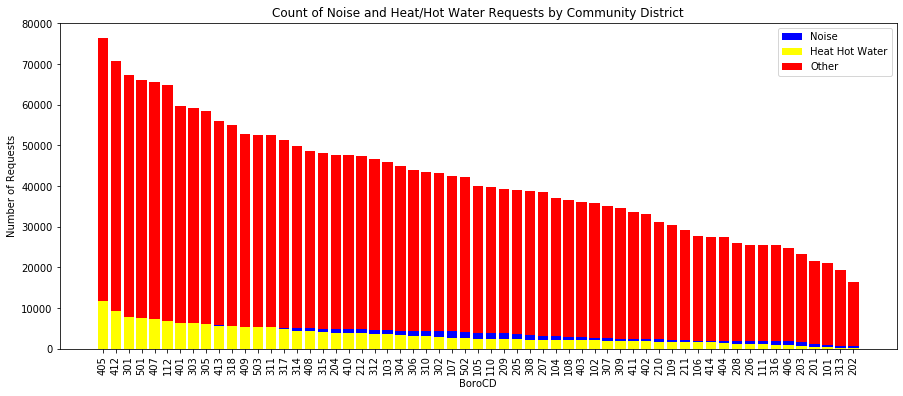

In [10]:
position_on_x = np.arange(len(count_other))

counts1 = np.array(count_noise.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)
counts2 = np.array(count_heatwater.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)
counts3 = np.array(count_other.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)


plt.figure(figsize=(15, 6))

plot1 = plt.bar(
  position_on_x,
  counts1,
  align='center',
  color='blue',
  label='Noise'
)

plot2 = plt.bar(
  position_on_x,
  counts2,
   align='center',
  color='yellow',
  label='Heat Hot Water'
)
plot3 = plt.bar(
  position_on_x,
  counts3,
  bottom=counts1,
  align='center',
  color='red',
  label='Other'
)

plt.xticks(position_on_x, count_other.sort_values(by='count_of_311_requests', ascending=False).borocd, rotation=90)

plt.title('Count of Noise and Heat/Hot Water Requests by Community District')
plt.xlabel('BoroCD')
plt.ylabel('Number of Requests')
plt.legend()

plt.show()

In [0]:

population = pd.read_csv('https://data.cityofnewyork.us/api/views/xi7c-iiu2/rows.csv?accessType=DOWNLOAD', header='infer')

In [0]:

def recode_borocd_pop(row):
  if row.Borough == 'Manhattan':
    return str(100 + row['CD Number'])
  elif row.Borough == 'Bronx':
    return str(200 + row['CD Number'])
  elif row.Borough == 'Brooklyn':
    return str(300 + row['CD Number'])
  elif row.Borough == 'Queens':
    return str(400 + row['CD Number'])
  elif row.Borough == 'Staten Island':
    return str(500 + row['CD Number'])
  else:
    return 'Invalid borocd'

population['borocd'] = population.apply(recode_borocd_pop, axis=1)

In [0]:
noise_scat = [
  [population['2010 Population']/1000],
  [count_noise.count_of_311_requests]
]

heatwater_scat = [
  [population['2010 Population']/1000],
  [count_heatwater.count_of_311_requests]
]

other_scat = [
  [population['2010 Population']/1000],
  [count_other.count_of_311_requests]
]

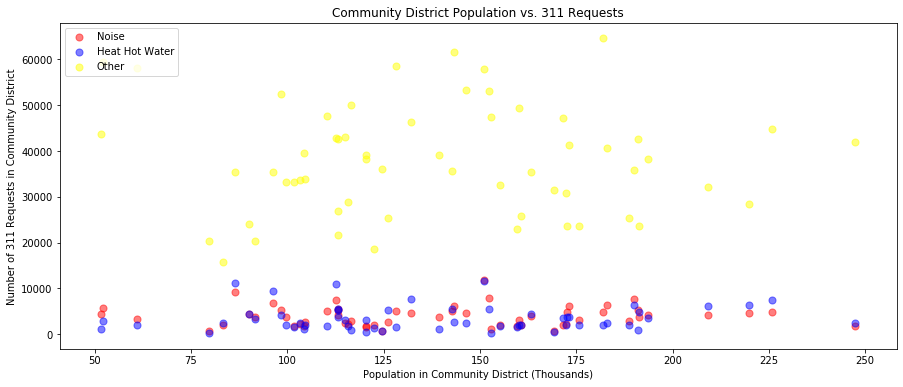

In [15]:
colors = ["red", "blue", "yellow"]

groups = ["Noise", "Heat Hot Water", "Other"]

plt.figure(figsize=(15,6))

plt.scatter(
  noise_scat[0],
  noise_scat[1],
  alpha=0.5,
  c=colors[0],
  s=50,
  label=groups[0]
)

plt.scatter(
  heatwater_scat[0],
  heatwater_scat[1],
  alpha=0.5,
  c=colors[1],
  s=50,
  label=groups[1]
)
plt.scatter(
  other_scat[0],
  other_scat[1],
  alpha=0.5,
  c=colors[2],
  s=50,
  label=groups[2]
)

plt.title('Community District Population vs. 311 Requests')
plt.xlabel('Population in Community District (Thousands)')
plt.ylabel('Number of 311 Requests in Community District')

plt.legend(loc=2)

plt.show()

It does not seem like there's a positive correlation between population and noise complaints or population and heat/water complaints.
One posssible explanation would be some areas have high noise levels because of the local activities. 